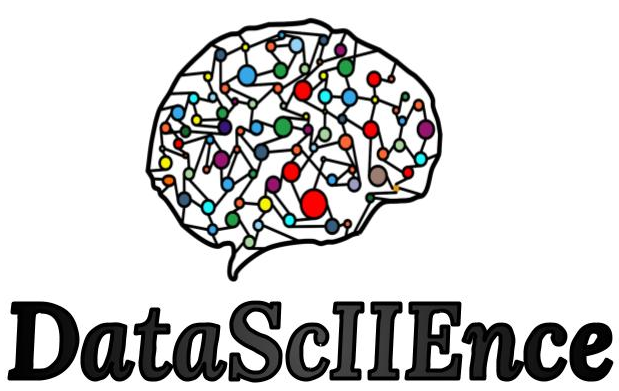


# Objectif

Dans cette formation, **nous allons explorer deux méthodes de web scraping** :


1.   **Requests et BeautifulSoup** : pour extraire des données statiques à partir d'une page HTML.
2.   **Playwright** : une approche plus avancée pour manipuler des sites web dynamiques en automatisant un navigateur.


Nous commencerons par scraper une page HTML simple avec **BeautifulSoup**, une méthode rapide et efficace lorsque le contenu d'un site est entièrement chargé statiquement. Ensuite, nous passerons à **Playwright**, un outil puissant pour manipuler des sites interactifs en simulant les actions humaines, comme cliquer sur des boutons ou charger du contenu dynamique, une tâche impossible avec BeautifulSoup.

# **Requests et BeautifulSoup**

**Le scraping de site web avec Requests et BeautifulSoup** consiste à télécharger une page HTML (avec Requests) et à extraire des informations à l'aide de BeautifulSoup. Cette approche fonctionne bien pour les sites statiques où les données se trouvent directement dans le HTML renvoyé par le serveur.

**Utilisation adaptée :**

*   **Sites statiques :** Les pages ne nécessitent pas d'interactions utilisateur pour charger les données (ex. scroll, clics).

*   **Avantages :** Léger, rapide à mettre en place.

*   **Limites :** Ne fonctionne pas pour les sites dynamiques où les données sont chargées via JavaScript.




## Importation des bibliothèques

Importation des bibliothèques nécessaires :

**pandas** pour la manipulation des données, **BeautifulSoup** pour le parsing HTML, **requests** pour les requêtes HTTP, et **re** pour les expressions régulières (cette dernière n'est pas spécifique au scraping mais est très utile pour le traitement des données et leur nettoyage).

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

## Récupération du fichier html



**Ce premier site est scrappable**

In [2]:
url = "https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html"

response = requests.get(url=url)

print(response.status_code)

200


On envoie une requête GET pour récupérer la page HTML du site. Le statut de la réponse est affiché (200 signifie que la page a été récupérée avec succès).

**Exemple d'un site non scrappable**

In [3]:
url_amazon = "https://www.amazon.com"
response_amazon = requests.get(url_amazon)
print(response_amazon.status_code)

503


Ici, la requête vers Amazon échoue probablement car **Amazon utilise des techniques anti-scraping (JavaScript, captcha)**. Les méthodes simples comme Requests ne fonctionnent pas. Il est tout de même possible de scraper le site en essayant de contourner ces barrières mais les méthodes utilisées ne seraient pas forcément légales.

Nous vous conseillons vivement de **vous renseigner sur la législation concernant la pratique du Web-Scraping**, surtout lorsque vos premières tentatives sont bloquées sur un site.



## Parsing du HTML avec BeautifulSoup

In [4]:
soup = BeautifulSoup(response.text)
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    Philosophy | 
     Books to Scrape - Sandbox

</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    
" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../../../../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../../../../static/oscar/css/styles.css" rel="stylesheet" t

On utilise BeautifulSoup pour parser la page HTML téléchargée et permettre d'extraire les informations structurées sous forme d'objets Python.



## Extraction des données

On observe que toutes les infos que l'on souhaite récupérer sont dans la balise article

In [5]:
articles = soup.find_all('article')
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="../../../sophies-world_966/index.html"><img alt="Sophie's World" class="thumbnail" src="../../../../media/cache/65/71/6571919836ec51ed54f0050c31d8a0cd.jpg"/></a>
 </div>
 <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="../../../sophies-world_966/index.html" title="Sophie's World">Sophie's World</a></h3>
 <div class="product_price">
 <p class="price_color">Â£15.94</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="../../../the-death-of-humanity-and-the-case-for-life_932/index.html"><img alt="The Death of Humanity: and t

On cherche toutes les balises `<article>`, qui contiennent des informations sur les livres. Le premier article est affiché pour inspection.

In [6]:
articles[0]

<article class="product_pod">
<div class="image_container">
<a href="../../../sophies-world_966/index.html"><img alt="Sophie's World" class="thumbnail" src="../../../../media/cache/65/71/6571919836ec51ed54f0050c31d8a0cd.jpg"/></a>
</div>
<p class="star-rating Five">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="../../../sophies-world_966/index.html" title="Sophie's World">Sophie's World</a></h3>
<div class="product_price">
<p class="price_color">Â£15.94</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [7]:
## prix du livre
prix = []
## titre du livre
titre = []
## Livre en stock ou pas
bool_stock = []



for article in articles :
    # on sélectionne la balise <h3>
    h3  = article.find('h3')
    ## au sein de <h3>, on sélectionne la balise <a>
    a_tag = h3.find('a')
    ## au sein de la balise <a>, on récupère le tag "title"
    title_name = a_tag["title"]
    titre.append(title_name)

    ## prix et diponibilité
    # prix
    div_price = article.find(class_="product_price")
    p_price = div_price.find(class_="price_color")
    prix.append(p_price.get_text())

    #dispo
    p_dispo = div_price.find(class_="instock availability")
    bool_stock.append(p_dispo.get_text().strip())

Ce bloc de code parcourt chaque article pour extraire :

*   Le titre du livre (à partir de la balise `h3`).
*   Le prix (balise de classe `price_color`).
*   La disponibilité en stock (balise de classe `instock availability`).



## Création d'un DataFrame pandas

In [8]:
index=[i for i in range(len(prix))]
df = pd.DataFrame({"Titre" : titre,"Prix" : prix, "Stock" : bool_stock}, index)
df

,Titre,Prix,Stock
0,Sophie's World,Â£15.94,In stock
1,The Death of Humanity: and the Case for Life,Â£58.11,In stock
2,The Stranger,Â£17.44,In stock
3,Proofs of God: Classical Arguments from Tertul...,Â£54.21,In stock
4,Kierkegaard: A Christian Missionary to Christians,Â£47.13,In stock
5,"At The Existentialist CafÃ©: Freedom, Being, a...",Â£29.93,In stock
6,Critique of Pure Reason,Â£20.75,In stock
7,"Run, Spot, Run: The Ethics of Keeping Pets",Â£20.02,In stock
8,The Nicomachean Ethics,Â£36.34,In stock
9,Meditations,Â£25.89,In stock


On stocke les données extraites dans un tableau pandas avec **trois colonnes : Titre, Prix, et Stock.**

## Nettoyage des données

In [9]:
def returns_only_number(price):
    price = re.findall(r'\d+\.\d+', price)
    price_value = float(price[0]) if price else None
    return price_value

Cette fonction utilise une expression régulière pour extraire uniquement les nombres des valeurs de prix (par exemple, **"£51.77" devient 51.77**). La colonne **Prix est nettoyée pour ne contenir que des valeurs numériques**. Ceci sera utile pour l'analyse des données.

In [10]:
df["Prix"] = df["Prix"].apply(returns_only_number)
df

,Titre,Prix,Stock
0,Sophie's World,15.94,In stock
1,The Death of Humanity: and the Case for Life,58.11,In stock
2,The Stranger,17.44,In stock
3,Proofs of God: Classical Arguments from Tertul...,54.21,In stock
4,Kierkegaard: A Christian Missionary to Christians,47.13,In stock
5,"At The Existentialist CafÃ©: Freedom, Being, a...",29.93,In stock
6,Critique of Pure Reason,20.75,In stock
7,"Run, Spot, Run: The Ethics of Keeping Pets",20.02,In stock
8,The Nicomachean Ethics,36.34,In stock
9,Meditations,25.89,In stock


# **Playwright** (Scraping dynamique)

Playwright permet d'**interagir avec les sites dynamiques en simulant des actions comme des clics et du défilement à partir d'un navigateur**. Ici, on utilise cette approche pour scraper Airbnb, un site dont les données sont chargées dynamiquement via **JavaScript**.

**Utilisation adaptée :**

*   **Sites dynamiques :** Les pages nécessitent des interactions utilisateur (scroll, clics) ou chargent des données après l'affichage initial.
*   **Avantages :** Permet d'interagir avec des sites complexes.
*   **Limites :** Plus lent et plus complexe que BeautifulSoup.



## Installation de Playwright et lancement du navigateur

Installation de la bibliothèque Playwright et du navigateur Chromium pour simuler un navigateur réel.

In [11]:
!pip install playwright
!playwright install chromium

import pandas as pd
import asyncio
from playwright.async_api import async_playwright

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: greenlet
    Found existing installation: greenlet 3.1.1
    Uninstalling greenlet-3.1.1:
      Successfully uninstalled greenlet-3.1.1
164 MiB [] 0% 0.0s164 MiB [] 0% 33.8s164 MiB [] 0% 23.8s164 MiB [] 0% 13.1s164 MiB [] 0% 6.7s164 MiB [] 1% 5.6s164 MiB [] 1% 4.9s164 MiB [] 2% 4.4s164 MiB [] 3% 4.2s164 MiB [] 3% 4.3s164 MiB [] 4% 3.9s164 MiB [] 4% 3.7s164 MiB [] 5% 3.6s164 MiB [] 6% 3.4s164 MiB [] 6% 3.3s164 MiB [] 7% 3.2s164 MiB [] 7% 3.1s164 MiB [] 8% 2.9s164 MiB [] 9% 3.0s164 MiB [] 9% 2.9s164 MiB [] 10% 2.9s164 MiB [] 11% 2.8s164 MiB [] 11% 2.7s164 MiB [] 12% 2.6s164 MiB [] 13% 2.6s164 MiB [] 14% 2.5s164 MiB [] 15% 2.4s164 MiB [] 16% 2.4s164 MiB [] 17% 2.3s164 MiB [] 18% 2.2s164 MiB [] 19% 2.1s164 MiB [] 20% 2.1s164 MiB [] 21% 2.0s164 MiB [] 22% 2.0s164 MiB [] 23% 1.9s164 MiB [] 24% 1.8s164 MiB [] 25

## Fonction pour extraire des données avec un sélecteur CSS

Cette fonction tente de **récupérer un élément sur la page à l'aide d'un sélecteur CSS** et **retourne son contenu texte**. Si l'élément n'est pas trouvé ou s'il y a une erreur, elle renvoie "Not available".

In [12]:
HOME_PAGE_URL = 'https://www.airbnb.fr'
COOKIES_BUTTON_SELECTOR = '.l1ovpqvx.atm_1he2i46_1k8pnbi_10saat9.atm_yxpdqi_1pv6nv4_10saat9.atm_1a0hdzc_w1h1e8_10saat9.atm_2bu6ew_929bqk_10saat9.atm_12oyo1u_73u7pn_10saat9.atm_fiaz40_1etamxe_10saat9.bmx2gr4.atm_9j_tlke0l.atm_9s_1o8liyq.atm_gi_idpfg4.atm_mk_h2mmj6.atm_r3_1h6ojuz.atm_rd_glywfm.atm_70_5j5alw.atm_tl_1gw4zv3.atm_9j_13gfvf7_1o5j5ji.c1ih3c6.atm_bx_48h72j.atm_cs_10d11i2.atm_5j_t09oo2.atm_kd_glywfm.atm_uc_1lizyuv.atm_r2_1j28jx2.atm_jb_1fkumsa.atm_3f_glywfm.atm_26_18sdevw.atm_7l_1v2u014.atm_8w_1t7jgwy.atm_uc_glywfm__1rrf6b5.atm_kd_glywfm_1w3cfyq.atm_uc_aaiy6o_1w3cfyq.atm_70_1b8lkes_1w3cfyq.atm_3f_glywfm_e4a3ld.atm_l8_idpfg4_e4a3ld.atm_gi_idpfg4_e4a3ld.atm_3f_glywfm_1r4qscq.atm_kd_glywfm_6y7yyg.atm_uc_glywfm_1w3cfyq_1rrf6b5.atm_kd_glywfm_pfnrn2_1oszvuo.atm_uc_aaiy6o_pfnrn2_1oszvuo.atm_70_1b8lkes_pfnrn2_1oszvuo.atm_3f_glywfm_1icshfk_1oszvuo.atm_l8_idpfg4_1icshfk_1oszvuo.atm_gi_idpfg4_1icshfk_1oszvuo.atm_3f_glywfm_b5gff8_1oszvuo.atm_kd_glywfm_2by9w9_1oszvuo.atm_uc_glywfm_pfnrn2_1o31aam.atm_tr_18md41p_csw3t1.atm_k4_kb7nvz_1o5j5ji.atm_3f_glywfm_1nos8r_uv4tnr.atm_26_wcf0q_1nos8r_uv4tnr.atm_7l_1v2u014_1nos8r_uv4tnr.atm_3f_glywfm_4fughm_uv4tnr.atm_26_4ccpr2_4fughm_uv4tnr.atm_7l_1v2u014_4fughm_uv4tnr.atm_3f_glywfm_csw3t1.atm_26_wcf0q_csw3t1.atm_7l_1v2u014_csw3t1.atm_7l_1v2u014_pfnrn2.atm_3f_glywfm_1o5j5ji.atm_26_4ccpr2_1o5j5ji.atm_7l_1v2u014_1o5j5ji.f1hzc007.atm_vy_1osqo2v.b1sbs18w.atm_c8_km0zk7.atm_g3_18khvle.atm_fr_1m9t47k.atm_l8_182pks8.dir.dir-ltr'
LOCATION_LINK_SELECTOR = '.l1ovpqvx.atm_1he2i46_1k8pnbi_10saat9.atm_yxpdqi_1pv6nv4_10saat9.atm_1a0hdzc_w1h1e8_10saat9.atm_2bu6ew_929bqk_10saat9.atm_12oyo1u_73u7pn_10saat9.atm_fiaz40_1etamxe_10saat9.bn2bl2p.atm_5j_223wjw.atm_9s_1ulexfb.atm_e2_1osqo2v.atm_fq_idpfg4.atm_mk_stnw88.atm_tk_idpfg4.atm_vy_1osqo2v.atm_26_1j28jx2.atm_3f_glywfm.atm_kd_glywfm.atm_3f_glywfm_jo46a5.atm_l8_idpfg4_jo46a5.atm_gi_idpfg4_jo46a5.atm_3f_glywfm_1icshfk.atm_kd_glywfm_19774hq.atm_uc_aaiy6o_1w3cfyq_oggzyc.atm_70_1b8lkes_1w3cfyq_oggzyc.atm_uc_glywfm_1w3cfyq_pynvjw.atm_uc_aaiy6o_pfnrn2_ivgyl9.atm_70_1b8lkes_pfnrn2_ivgyl9.atm_uc_glywfm_pfnrn2_61fwbc.dir.dir-ltr'
PRICE_SELECTOR = '._11jcbg2'
CAPACITY_SELECTOR = '.l7n4lsf.atm_9s_1o8liyq_keqd55.dir.dir-ltr'

async def get_product_selector(page, selector):
    try:
        # Only get the first element for the given selector
        product_element = await page.query_selector(selector)

        if product_element:
            text = await product_element.text_content()
            return text.strip() if text else "Not available"

    except Exception as e:
        # Catch more specific exceptions if possible
        print(f"Error retrieving data for selector {selector}: {str(e)}")
        return "Not available"

    return "Not available"  # Fallback return in case of no elements found

## Fonction de navigation avec tentatives répétées

Cette fonction permet de tenter plusieurs fois la navigation vers une page web (jusqu'à 10 essais) pour éviter des erreurs liées à des chargements lents ou des interruptions réseau.

In [13]:

async def perform_request_with_retry(page, url): # Function to attempt navigating to a given URL with retries in case of failure
    MAX_RETRIES = 10
    retry_count = 0

    while retry_count < MAX_RETRIES:
        try:
            await page.goto(url, timeout=30000)
            await asyncio.sleep(5)
            break
        except Exception as e:
            retry_count += 1
            if retry_count == MAX_RETRIES:
                raise Exception("Request timed out") from e

## Scraping des données produits, ici celles des biens mis en location

Pour chaque URL de produit, **la fonction accède à la page, récupère le prix et la capacité** (nombre de personnes logées) et les organise dans un dictionnaire.

In [14]:
async def scrape_product_data(page, url):

    # Navigate to the product page
    await perform_request_with_retry(page, HOME_PAGE_URL+url)


    # Scrape the data
    try:
        location_price = await get_product_selector(page, PRICE_SELECTOR)
        location_capacity = await get_product_selector(page, CAPACITY_SELECTOR)


        # Organize data into a tuple or dict
        product_data = {
            "location url": url,
            "price": location_price,
            "capacity": location_capacity
        }

        return product_data

    except Exception as e:
        print(f"Error scraping data for {url}: {str(e)}")
        return None

## Boucle de collecte des données

**Cette fonction collecte toutes les URLs des locations, puis scrape les données** (prix, capacité) pour chacune d'elles. Les données sont stockées dans un DataFrame pandas.

In [15]:
async def run(playwright):
  async with async_playwright() as pw:
      browser = await playwright.chromium.launch(headless=True) # change headless argument into "False" to see the navigator actions,

      page = await browser.new_page()

      await perform_request_with_retry(page, HOME_PAGE_URL)
      await asyncio.sleep(10)


      # Handle cookies
      try:
          cookies_button = await page.query_selector(COOKIES_BUTTON_SELECTOR)
          if cookies_button:
              await cookies_button.click()
              print("Cookies accepted")
          else:
              print("No cookies button found")
      except Exception as e:
          print(f"Exception occurred while accepting cookies: {e}")


      data = []
      columns=['location url','price', 'capacity']

      location_urls = []

      all_locations = await page.query_selector_all(LOCATION_LINK_SELECTOR)
      print(f"Found {len(all_locations)} locations")

      # Extract the href attribute for each location and append to location_urls list
      for item in all_locations:
          url = await item.get_attribute('href')
          if url: # filter out None
              location_urls.append(url)

      print(f"Found {len(location_urls)} location URLs")

      # Loop through each location URL and scrape the necessary information
      for i, url in enumerate(location_urls):
          # Add the scraped information to a list
          result = await scrape_product_data(page, url)
          if result:
              data.append(result)
          if i % 10 == 0 and i > 0:
              print(f"Processed {i} links.")

      df = pd.DataFrame(data, columns=columns)

      # Close the browser
      await browser.close()

      return df

## Lancement du scraping

**Cette fonction lance l'opération de scraping en appelant main()**. Si nécessaire, elle utilise asyncio.run() pour **gérer les événements asynchrones**, particulièrement utile dans des environnements comme Jupyter/Colab.

In [16]:
async def main():
    async with async_playwright() as playwright:
        return await run(playwright)

In [17]:
# Check if there's already a running event loop (for environments like Jupyter/Colab)
try:
    result_df = await main()
except RuntimeError:
    result_df = asyncio.run(main())

result_df

Cookies accepted
Found 20 locations
Found 20 location URLs
Processed 10 links.


,location url,price,capacity
0,/rooms/51165983?adults=1&category_tag=Tag%3A82...,136 €,6 voyageurs ·
1,/rooms/31354055?adults=1&category_tag=Tag%3A82...,133 €,4 voyageurs ·
2,/rooms/609590099420790331?adults=1&category_ta...,96 €,4 voyageurs ·
3,/rooms/626927647023352545?adults=1&category_ta...,203 €,4 voyageurs ·
4,/rooms/48733885?adults=1&category_tag=Tag%3A82...,142 €,2 voyageurs ·
5,/rooms/43367685?adults=1&category_tag=Tag%3A82...,126 €,3 voyageurs ·
6,/rooms/678889148807127320?adults=1&category_ta...,208 €,6 voyageurs ·
7,/rooms/29911824?adults=1&category_tag=Tag%3A82...,229 €,4 voyageurs ·
8,/rooms/46417635?adults=1&category_tag=Tag%3A82...,192 €,2 voyageurs ·
9,/rooms/710067245874346131?adults=1&category_ta...,160 €,4 voyageurs ·


Le résultat final est un DataFrame pandas contenant les informations sur les logements (URL, prix, capacité). Ce DataFrame peut être utilisé pour analyses ou traitements ultérieurs.

## Comparaison avec Selenium

**Selenium est un autre outil très populaire** pour manipuler des navigateurs. La principale différence avec Playwright réside dans la performance et la simplicité. Playwright est souvent plus rapide en exécution, prend en charge plusieurs langages de programmation et gère les tests parallèles de manière plus efficace. Cependant, les deux outils peuvent être utilisés pour des tâches similaires.

Selenium est plus connu ea des meilleurs outils de déboggage

## Importance d’un scraping éthique
Le scraping doit toujours respecter les conditions d'utilisation des sites. Il est essentiel de :

*   **Limiter la fréquence des requêtes** pour ne pas surcharger le serveur.
*   **Respecter les fichiers robots.txt** qui spécifient les parties du site qui ne doivent pas être scrappées (exemple: airbnb.robots.txt)
*   **Ne pas scraper des données personnelles sans consentement**.


Un scraping éthique permet de préserver les ressources du site et d'éviter les risques légaux.